0.004741623330437601 x= -6.0 y= 0.0024726231566347743
0.015362018686421635 x= -4.8 y= 0.008162571153159897
0.04714641909754709 x= -3.6 y= 0.026596993576865856
0.12358543333921661 x= -2.4000000000000004 y= 0.08317269649392235
0.223770652915848 x= -1.2000000000000002 y= 0.23147521650098232
0.22377065291584808 x= 0.0 y= 0.5
0.12358543333921666 x= 1.1999999999999993 y= 0.7685247834990175
0.047146419097547014 x= 2.4000000000000004 y= 0.9168273035060777
0.015362018686421739 x= 3.5999999999999996 y= 0.973403006423134
0.004741623330437683 x= 4.799999999999999 y= 0.9918374288468401


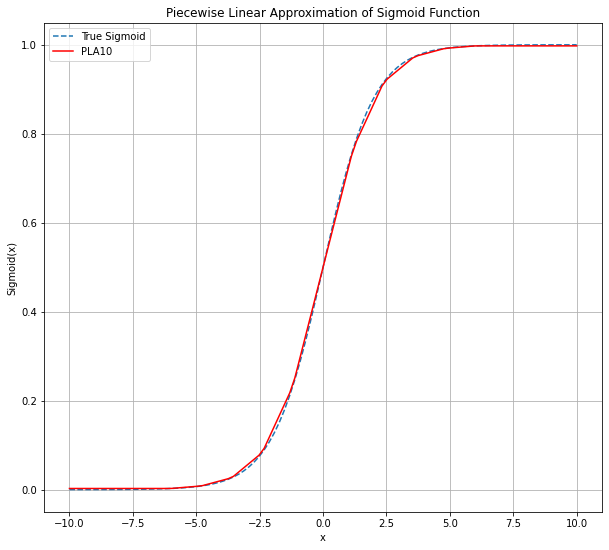

Max Error for 4 slice: 0.015324502579638244
Max Error for 8 slice: 0.015324502579638244
Max Error for 10 slice: 0.015324502579638244
Max Error for 16 slice: 0.0065224959360074


In [24]:
import numpy as np

class PiecewiseSigmoid:
    def __init__(self, num_slices=10, input_range=(-6, 6)):
        """
        Initialize the piecewise linear approximation of the sigmoid function.
        :param num_slices: Number of linear segments to approximate the sigmoid function.
        :param input_range: Range of input values to consider for approximation.
        """
        self.num_slices = num_slices
        self.input_range = input_range
        self.breakpoints = np.linspace(input_range[0], input_range[1], num_slices + 1)
        self.slopes, self.intercepts = self._compute_segments()

    def _sigmoid(self, x):
        """Compute the sigmoid function."""
        return 1 / (1 + np.exp(-x))

    def _compute_segments(self):
        """Compute the slopes and intercepts for each linear segment."""
        slopes = []
        intercepts = []
        for i in range(len(self.breakpoints) - 1):
            x1, x2 = self.breakpoints[i], self.breakpoints[i + 1]
            y1, y2 = self._sigmoid(x1), self._sigmoid(x2)
            slope = (y2 - y1) / (x2 - x1)
            intercept = y1 - slope * x1
            print(slope, "x=", x1, "y=", y1)
            slopes.append(slope)
            intercepts.append(intercept)
        return slopes, intercepts

    def __call__(self, x):
        """
        Evaluate the piecewise linear sigmoid approximation at a given input x.
        :param x: Input value or numpy array.
        :return: Approximation of sigmoid(x).
        """
        if isinstance(x, (int, float)):  # Handle scalar input
            return self._evaluate(x)
        elif isinstance(x, np.ndarray):  # Handle numpy array input
            return np.array([self._evaluate(val) for val in x])
        else:
            raise ValueError("Input must be a scalar or a numpy array.")

    def _evaluate(self, x):
        """Evaluate the piecewise linear sigmoid approximation for a single input."""
        if x <= self.breakpoints[0]:
            return self._sigmoid(self.breakpoints[0])
        elif x >= self.breakpoints[-1]:
            return self._sigmoid(self.breakpoints[-1])
        for i in range(len(self.breakpoints) - 1):
            if self.breakpoints[i] <= x < self.breakpoints[i + 1]:
                return self.slopes[i] * x + self.intercepts[i]
        return self._sigmoid(x)  # Fallback (though it shouldn't reach here)
    
    def compute_error(self,x_values):
        x_values = np.array(x_values)
        approximated_values = self(x_values)
        true_values = self._sigmoid(x_values)
        errors = np.abs(approximated_values - true_values)
        max_error = errors.max()
        return errors, max_error

# Example usage
# sigmoid_approx = PiecewiseSigmoid(num_slices=16, input_range=(-6, 6))
# x_values16 = np.linspace(-10, 10, 100)
# y_values16 = sigmoid_approx(x_values16)
# error16,max_error16 = sigmoid_approx.compute_error(x_values16)

sigmoid_approx = PiecewiseSigmoid(num_slices=10, input_range=(-6, 6))
x_values = np.linspace(-10, 10, 100)
y_values = sigmoid_approx(x_values)
error,max_error = sigmoid_approx.compute_error(x_values)

# sigmoid_approx8 = PiecewiseSigmoid(num_slices=8, input_range=(-6, 6))
# x_values8 = np.linspace(-10, 10, 100)
# y_values8 = sigmoid_approx8(x_values8)
# error8,max_error8 = sigmoid_approx.compute_error(x_values8)

# sigmoid_approx4 = PiecewiseSigmoid(num_slices=4, input_range=(-6, 6))
# x_values4 = np.linspace(-10, 10, 100)
# y_values4 = sigmoid_approx4(x_values4)
# error4,max_error4 = sigmoid_approx.compute_error(x_values4)



# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10,9))
plt.plot(x_values, 1 / (1 + np.exp(-x_values)), label="True Sigmoid", linestyle="--")
plt.plot(x_values, y_values, label="PLA10", color="red")
# plt.plot(x_values8, y_values8, label="PLA8", color="yellow")
# plt.plot(x_values4, y_values4, label="PLA4", color="blue")
plt.legend()
plt.xlabel("x")
plt.ylabel("Sigmoid(x)")
plt.title("Piecewise Linear Approximation of Sigmoid Function")
plt.grid(True)

plt.show()

print(f'Max Error for 4 slice: {max_error4}')
print(f'Max Error for 8 slice: {max_error8}')
print(f'Max Error for 10 slice: {max_error}')
print(f'Max Error for 16 slice: {max_error16}')
